## Clustering

***Import Library***

In [23]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from IPython.display import display

***Load Dataset***

In [24]:
df = pd.read_csv('Mall_Customers.csv')
display(df.head())

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


***Preprocessing***

In [25]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [26]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [27]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

***Clustering dengan K-means***

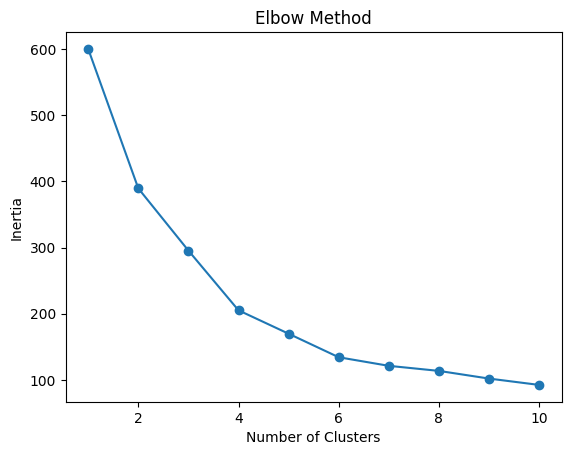

In [28]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [29]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

***Evaluasi Clustering***

In [30]:
silhouette_avg = silhouette_score(X_scaled, df['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.40846873777345605


***Interpretasi Hasil Clustering***

In [31]:
cluster_summary = df.groupby('Cluster').agg({
    'Age': ['mean', 'min', 'max'],
    'Annual Income (k$)': ['mean', 'min', 'max'],
    'Spending Score (1-100)': ['mean', 'min', 'max'],
    'Gender': lambda x: x.mode()[0]
})
display(cluster_summary)

Age         Annual Income (k$)          Spending Score (1-100)  \
              mean min max               mean min  max                   mean   
Cluster                                                                         
0        55.275862  40  70          47.620690  19   67              41.706897   
1        32.875000  27  40          86.100000  69  137              81.525000   
2        25.769231  18  35          26.115385  15   42              74.846154   
3        26.733333  18  40          54.311111  16   81              40.911111   
4        44.387097  32  59          89.774194  71  137              18.483871   

                  Gender  
        min max <lambda>  
Cluster                   
0         3  60        0  
1        58  97        0  
2        39  99        0  
3         5  60        0  
4         1  39        1

***Simpan Dataset dengan Label***

In [32]:
df.to_csv('Mall_Customers_Labeled.csv', index=False)